<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/FIntech_n23Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "머신러닝을 활용한 트레이딩 모델 개발"

### 코랩에 기술적 분석을 위한 talib + FinanceDataReader 설치 

In [2]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 266kB 3.5MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531828 sha256=c87774d280eb8b3fcb06823112eb341b146e3edf625ff82ebda508a5819b49a6
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20dc42c28a07efb297dad4303948ef6dd4a3c7257553db8f09
Successfully built ta-lib


In [3]:
!pip -q install finance-datareader

## talib Package Example

In [4]:
import numpy as np
import pandas as pd
import talib as ta
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

FinanceDataReader 를 이용하면 주가 데이터를 쉽게 가지고 올 수 있음.  
기본 주가 데이터와 함께 Change = 주가수익률 데이터 수집할 수 있음. 

In [9]:
Df = fdr.DataReader('005930', '2017')
Df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2020-07-22,55300,55500,54700,54700,12885057,-0.010850
2020-07-23,54700,54700,53800,54100,16214932,-0.010969
2020-07-24,54000,54400,53700,54200,10994535,0.001848


In [10]:
Df = fdr.DataReader('AAPL', '2017-01-01', '2018-01-01')
print(Df.shape)
Df.head()

(251, 6)


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,116.15,115.80,116.33,114.76,28780000.0,0.0028
2017-01-04,116.02,115.85,116.51,115.75,21120000.0,-0.0011
2017-01-05,116.61,115.92,116.86,115.81,22190000.0,0.0051
2017-01-06,117.91,116.78,118.16,116.47,31750000.0,0.0111
2017-01-09,118.99,117.95,119.43,117.94,33560000.0,0.0092


#### 이동평균

In [12]:
%timeit pd_MA = Df['Close'].rolling(window=5).mean(). #Pandas 활용

1000 loops, best of 3: 477 µs per loop


In [13]:
%timeit Ta_MA = ta.MA(Df['Close'], timeperiod = 5 )   #talib 활용 -> pandas에 비해 속도가 빠름

The slowest run took 7.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 66.4 µs per loop


### 볼린저밴드 그래프 그리기

`ta.BBANDS()` 를 활용하여 upper, middle, lower 값을 쉽게 구할 수 있음.  
중심선 middle : 이동평균   
상단선 upper : 이동평균 + 표준편차 * 2   
하단선 lower : 이동평균 - 표준편차 * 2  

[볼린저밴드](https://namu.wiki/w/볼린저%20밴드)


In [17]:
upper, middle, lower = ta.BBANDS(Df['Close'], 
                                 timeperiod = 10, #2주 가정 -> 10 Days
                                 nbdevup = 2,     # +2 표준편차
                                 nbdevdn = 2)     # -2 표준편차

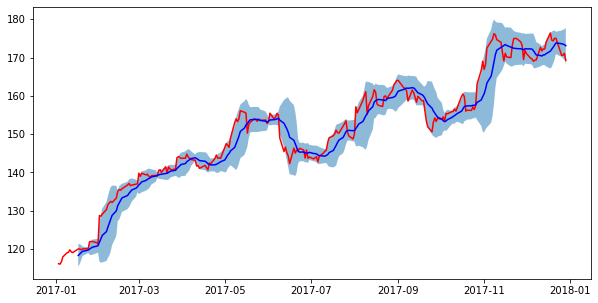

In [18]:
plt.figure(figsize = (10, 5))
plt.plot(Df['Close'], 'r-')
plt.plot(middle, 'b-')
plt.fill_between(Df.index, lower, upper, alpha=0.5)
plt.show()

## GLD 골드 ETF example

In [50]:
Df = fdr.DataReader('GLD', '2015-01-01', 
                    '2018-01-01')
print(Df.shape)
Df.head()

(755, 6)


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,114.08,112.49,114.80,112.32,7110000.0,0.0044
2015-01-05,115.80,114.78,116.00,114.73,8180000.0,0.0151
2015-01-06,117.12,116.22,117.50,115.80,11240000.0,0.0114
2015-01-07,116.43,116.47,116.88,116.17,6430000.0,-0.0059
2015-01-08,115.94,116.45,116.87,115.85,7030000.0,-0.0042


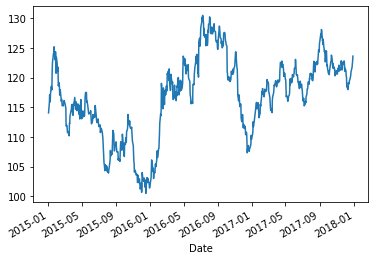

In [22]:
Df['Close'].plot()

### SVM(Soft Vector Machine) model 과 RandomForest **model**

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [51]:
n=10  # 2주 기간

Df['RSI'] = ta.RSI( Df['Close'].shift(1), timeperiod=n)
Df['SMA'] = ta.MA(Df['Close'].shift(1), 
                   timeperiod= n )
Df['ADX'] = ta.ADX(Df['High'].shift(1), 
                   Df['Low'].shift(1),
                   Df['Close'].shift(1),
                   timeperiod= n )
Df['SAR'] = ta.SAR(Df['High'].shift(1), 
                   Df['Low'].shift(1),
                   0.02, 0.2)

Df['OO'] = Df['Open'] - Df['Open'].shift(1)
Df['OC'] = Df['Open'] - Df['Close'].shift(1)

* [RSI](https://ko.wikipedia.org/wiki/RSI_(투자지표)) : Relative Strength Index : 가격의 상승압력과 하락압력 간의 상대적인 강도
* [SMA](https://medium.com/@igniter.yoo/기술적-분석의-기초-basics-of-technical-analysis-10-이동-평균-46b0d8ddf576) : Simple Moving Average : 단순이동평균, 모든 종가를 더해 총일로 나눈 값 
* [ADX](http://blog.naver.com/PostView.nhn?blogId=liebeljd&logNo=60107680352&parentCategoryNo=&categoryNo=273&viewDate=&isShowPopularPosts=true&from=search) : Average directional movement index : 평균 방향 지수, 추세의 강도를 보여줌 
* [SAR](https://academy.binance.com/ko/economics/a-brief-guide-to-the-parabolic-sar-indicator) : Stop and Reverse Index : 파라볼릭 SAR, 시장 추세와 잠재적 전환 시점을 파악하기 위해 사용되는 지표 

In [52]:
split = int(0.8 * len(Df))

Df['Ret'] = np.log(Df['Close'].shift(-5)/Df['Close']) # Return : 향후 5일 뒤의 로그 수익률 
Df['Signal'] = 0
Df.loc[Df['Ret'] > Df['Ret'][:split].quantile(0.66),
       'Signal'] = 1
Df.loc[Df['Ret'] < Df['Ret'][:split].quantile(0.33),
       'Signal'] = -1
       

In [53]:
Df.head()

,Close,Open,High,Low,Volume,Change,RSI,SMA,ADX,SAR,OO,OC,Ret,Signal
Date,,,,,,,,,,,,,,
2015-01-02,114.08,112.49,114.80,112.32,7110000.0,0.0044,NaN,NaN,NaN,NaN,NaN,NaN,0.027494,1
2015-01-05,115.80,114.78,116.00,114.73,8180000.0,0.0151,NaN,NaN,NaN,NaN,2.29,0.70,0.023555,1
2015-01-06,117.12,116.22,117.50,115.80,11240000.0,0.0114,NaN,NaN,NaN,112.320000,1.44,0.42,0.008841,1
2015-01-07,116.43,116.47,116.88,116.17,6430000.0,-0.0059,NaN,NaN,NaN,112.393600,0.25,-0.65,0.013140,1
2015-01-08,115.94,116.45,116.87,115.85,7030000.0,-0.0042,NaN,NaN,NaN,112.597856,-0.02,0.02,0.042222,1


로그수익률의 상위 2/3보다 크면 1을 주고 1/3보다 작으면 -1을 준다. 

[로그 수익률](https://insightcampus.co.kr/pt06/) : 금융 분야에서 주로 사용되는 수익률

In [54]:
Df = Df.dropna()
X = Df.drop(['Open','High','Low','Close','Volume','Change','Ret','Signal'],
            axis=1)
y = Df['Signal']

In [55]:
X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

#### 정규화

각 Feature 들의 범위가 다양할 경우 모델 트레이닝 하는 게 어려움.   
이를 해결하기 위해 "정규화" 처리

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
model = SVC()

#### Soft Vector Machine

SVC 모델은 다양한 hyper parameter 들이 존재.  
파라메터들을 최적화하는 과정이 필요.  
CloseVaildation

In [58]:
import warnings
warnings.filterwarnings('ignore')

params = {'C' : np.arange(1,30)}
#rcv = RandomizedSearchCV(model, params, cv = 10)
rcv = GridSearchCV(model, params, cv = 10 )
rcv.fit(scaler.transform(X_train), y_train)
rcv.best_params_['C']

15

HyperParameter C 의 값은 15

In [59]:
model = SVC(C=15)

In [60]:
model.fit(scaler.transform(X_train), y_train)

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
predict = model.predict(scaler.transform(X_test)) # 모델 예측

In [62]:
Df['Signal'][split:] = predict

Trading Model의 경우 정확도 보다는 예측값을 바탕으로 수익 가능성에 대한 결과를 확인하는 것이 더 중요.  

In [63]:
Df['Strategy_Return'] = Df.Signal * Df.Ret

In [66]:
Df['GLD_Return'] = np.log(Df['Close'].shift(-1)/Df['Close'])

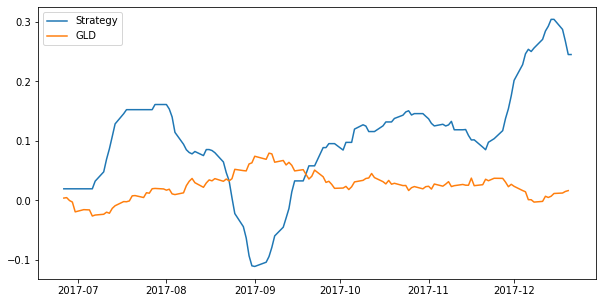

In [69]:
plt.figure(figsize = (10,5))
plt.plot(Df['Strategy_Return'][split:].cumsum(), label ='Strategy')
plt.plot(Df['GLD_Return'][split:].cumsum(), label = 'GLD')
plt.legend()
plt.show()

주황색 선은 GLD의 로그수익률, 파란색 선은 전략에 의한 로그수익률.  
전략에 의한 수익률이 최종적으로 높다는 것을 알 수 있음.  
하지만 이 전략이 정말 유용한 전략인지는 매우 다양한 지표들을 통해 추가 확인이 필요함.  


#### 통계량 함수

In [70]:
def get_stats(s, n = 252):
    s = s.dropna()
    win = len(s[s>0])
    loss = len(s[s<0])
    mean_win = round(s[s>0].mean(), 3)
    mean_loss = round(s[s<0].mean(), 3)
    max_loss = round(s.min(), 3)
    Win_Ratio = round(win/len(s), 3)
    PnL_Ratio = round(mean_win/abs(mean_loss), 3)
    SR = round(s.mean()/ np.std(s)*np.sqrt(n), 3)

    print('Trades : ', len(s),
          '\n Win : ', win,
          '\n Loss : ', loss,
          '\n WinRatio : ', Win_Ratio,
          '\n PnLRatio : ', PnL_Ratio,
          '\n SharpsRatio : ', SR,
          '\n MaxLoss : ', max_loss,)

In [71]:
get_stats(Df.Strategy_Return[split:])

Trades :  126 
 Win :  55 
 Loss :  38 
 WinRatio :  0.437 
 PnLRatio :  1.083 
 SharpsRatio :  2.502 
 MaxLoss :  -0.03
